In [1]:
!pip install tensorflow tensorflow_decision_forests
#Bu kodlar google colab ortamına uygundur. Tensor flow decision foresti kendi bilgisayar ortamınıza kullanmak isterseniz kütüphanenin kendi sitesinden
#uygulamanız gereken adımları takip edip devam edebilirsiniz.

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 29.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.1/524.1 MB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 33.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 26.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 15.1 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.7.1
    Uninstalling typing_extensions-4.7.1:
      Successfully uninstalled typing_extensions-4.7.1
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.12.0
    Uninstalling tensorflow-estimator-2.12.0:
      Successfully uninstalled tensorflow-estimator-2.12.0
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
  Attempting uninstall: tensorboard
    F

In [2]:
import tensorflow as tf
import tensorflow_decision_forests as tfdf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
print("TensorFlow v" + tf.__version__)
print("TensorFlow Decision Forests v" + tfdf.__version__)
!pip install wurlitzer -U -qq

TensorFlow v2.13.0
TensorFlow Decision Forests v1.5.0


In [14]:
dataset_df = pd.read_csv("verilerist4.csv")

In [15]:
yuzdeDoksanDokuzDf = dataset_df.sort_values("Fiyatlar",ascending = False).iloc[118:]
yuzdeDoksanDokuzDf2 = yuzdeDoksanDokuzDf.sort_values("Fiyatlar",ascending= True).iloc[118:]
son2 = yuzdeDoksanDokuzDf2.sort_values("Metrekare",ascending= True).iloc[118:]
son3 = son2.sort_values("Metrekare",ascending= False).iloc[118:]
dataset_df = son3.sort_values("Yas",ascending= False).iloc[118:]

In [8]:
from IPython.core.magic import register_line_magic
from IPython.display import Javascript
from IPython.display import display

@register_line_magic
def set_cell_height(size):
  display(
      Javascript("google.colab.output.setIframeHeight(0, true, {maxHeight: " +
                 str(size) + "})"))

In [16]:
import numpy as np

def split_dataset(dataset, test_ratio=0.20):
  test_indices = np.random.rand(len(dataset)) < test_ratio
  return dataset[~test_indices], dataset[test_indices]

train_ds_pd, valid_ds_pd = split_dataset(dataset_df)

In [38]:
label = 'Fiyatlar'
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_ds_pd, label=label, task = tfdf.keras.Task.REGRESSION)
valid_ds = tfdf.keras.pd_dataframe_to_tf_dataset(valid_ds_pd, label=label, task = tfdf.keras.Task.REGRESSION)
#Test ve eğitim verimizi tensor flowun kendi kullandığı türden bir data sete çeviriyoruz. Task parametresine
#regresyon ifadesini eklememiz şart.

In [39]:
%%time
%set_cell_height 300

# En iyi parametlerin tespit edilmesi için randomsearch ile modelimize tuner yapıyoruz. Bu işlem uzun sürecektir.
tuner = tfdf.tuner.RandomSearch(num_trials=100, use_predefined_hps=True)

rf = tfdf.keras.GradientBoostedTreesModel(tuner=tuner,task = tfdf.keras.Task.REGRESSION)
rf.fit(train_ds, verbose=2)


<IPython.core.display.Javascript object>

Use /tmp/tmp3t5c8msq as temporary training directory
Reading training dataset...
Training tensor examples:
Features: {'Metrekare': <tf.Tensor 'data:0' shape=(None,) dtype=int64>, 'Yas': <tf.Tensor 'data_1:0' shape=(None,) dtype=int64>, 'Konum': <tf.Tensor 'data_2:0' shape=(None,) dtype=string>, 'Oda': <tf.Tensor 'data_3:0' shape=(None,) dtype=string>}
Label: Tensor("data_4:0", shape=(None,), dtype=int64)
Weights: None
Normalized tensor features:
 {'Metrekare': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast:0' shape=(None,) dtype=float32>), 'Yas': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast_1:0' shape=(None,) dtype=float32>), 'Konum': SemanticTensor(semantic=<Semantic.CATEGORICAL: 2>, tensor=<tf.Tensor 'data_2:0' shape=(None,) dtype=string>), 'Oda': SemanticTensor(semantic=<Semantic.CATEGORICAL: 2>, tensor=<tf.Tensor 'data_3:0' shape=(None,) dtype=string>)}
Training dataset read in 0:00:00.374284. Found 8953 examples.
Training model

[INFO 23-07-26 15:54:18.8870 UTC kernel.cc:773] Start Yggdrasil model training
[INFO 23-07-26 15:54:18.8870 UTC kernel.cc:774] Collect training examples
[INFO 23-07-26 15:54:18.8870 UTC kernel.cc:787] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: NUMERICAL
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false

[INFO 23-07-26 15:54:18.8873 UTC kernel.cc:393] Number of batches: 9
[INFO 23-07-26 15:54:18.8874 UTC kernel.cc:394] Number of examples: 8953
[INFO 23-07-26 15:54:18.8901 UTC data_spec_inference.cc:305] 282 item(s) have been pruned (i.e. they are considered out of dictionary) for the column Konum (362 item(s) left) because min_value_count=5 and max_number_of_unique_values=2000
[INFO 23-07-26 15:54:18.8904 UTC data_spec_inference.cc:305] 26 item(s) have been pruned (i.e. they are considered out 

Model trained in 0:54:44.772247
Compiling model...


Model compiled.
CPU times: user 1h 26min 29s, sys: 10.5 s, total: 1h 26min 39s
Wall time: 54min 45s


In [40]:
tfdf.model_plotter.plot_model_in_colab(rf, tree_idx=0, max_depth=3)

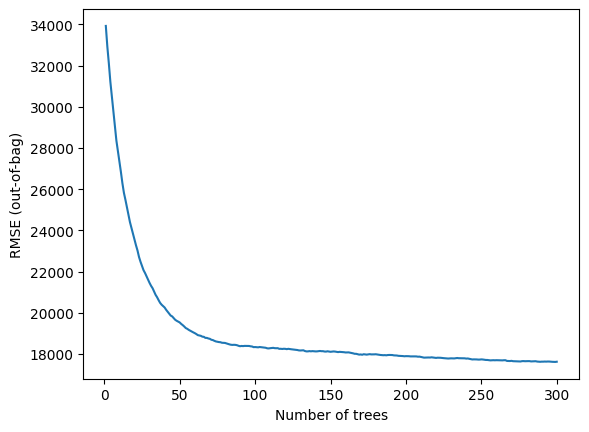

In [41]:
import matplotlib.pyplot as plt
logs = rf.make_inspector().training_logs()
plt.plot([log.num_trees for log in logs], [log.evaluation.rmse for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("RMSE (out-of-bag)")
plt.show()

In [42]:
tahmin = rf.predict(valid_ds)
cikti = pd.DataFrame({'Tahmin': tahmin.squeeze()})
#Modele eğitmediğimiz test verimizi eğiterek data frame çerçevesine aktarıyoruzki görüntüleyelim.



3/3 [==============================] - 0s 27ms/step


In [43]:
valid_ds_pd.head()
#Test verimizi bir inceleyelim. Indexler dağınık halde daha önce sort işlemi yaptığımız için.
#Concat yaparken indexler sorun çıkaracağı için index resetleme yaparak yeni çerçevemizde birleştiriyoruz.

,Fiyatlar,Metrekare,Yas,Konum,Oda
8920,30000,125,55,"Beyoğlu,PürtelaşHasanEfendi Mahallesi",2 + 1
4260,18000,90,55,"Şişli,Meşrutiyet Mahallesi",3 + 1
5928,27000,145,54,"Kadıköy,Caferağa Mahallesi",3 + 1
11806,50490,204,53,"Beşiktaş,Etiler Mahallesi",3 + 1
10014,16000,80,50,"Üsküdar,Cumhuriyet Mahallesi",2 + 1


In [44]:
tahminDf = pd.concat([cikti,valid_ds_pd.reset_index().Fiyatlar],axis=1)
#Test ve tahmin verisini birleştirdik.

In [45]:
tahminDf.head(50)
#Gözlemliyelim.

,Tahmin,Fiyatlar
0,41158.390625,30000
1,26354.302734,18000
2,36030.078125,27000
3,51632.152344,50490
4,10962.283203,16000
5,27181.224609,30000
6,16052.531250,23000
7,95920.218750,150000
8,11659.527344,16000
9,39030.921875,60000


<Axes: xlabel='Fiyatlar', ylabel='Tahmin'>

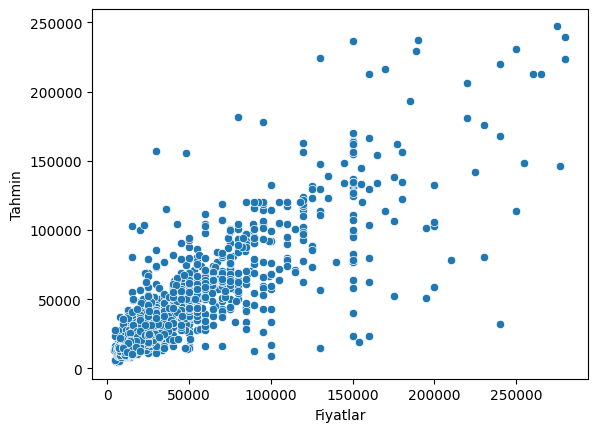

In [46]:
sns.scatterplot(x = "Fiyatlar", y = "Tahmin", data = tahminDf)

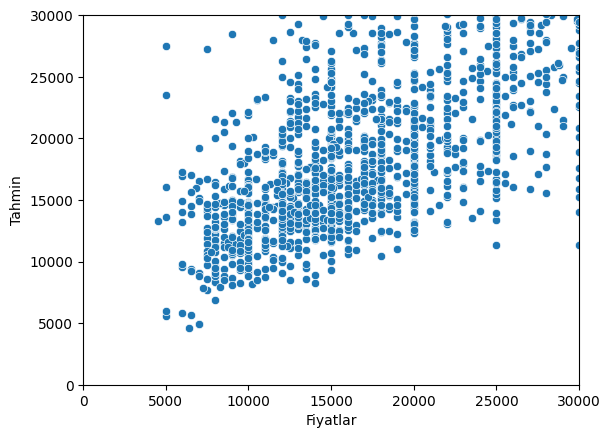

In [47]:
sns.scatterplot(x="Fiyatlar", y="Tahmin", data=tahminDf)

plt.xlim(0, 30000)
plt.ylim(0, 30000)

plt.show()


In [48]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [49]:
mean_absolute_error(tahminDf["Fiyatlar"],tahminDf["Tahmin"])

9763.376629440076

In [50]:
mean_squared_error(tahminDf["Fiyatlar"],tahminDf["Tahmin"])

369639044.1543123

In [51]:
from sklearn.metrics import r2_score
r2_skoru = r2_score(tahminDf["Fiyatlar"],tahminDf["Tahmin"])

print("R2 Skoru:", r2_skoru)

R2 Skoru: 0.7417732859142416


In [52]:
veri = {
    'Metrekare': [120],
    'Yas': [80],
    'Konum': ["Beyoğlu,Cihangir Mahallesi"],
    'Oda': ["2 + 1"]

}

# DataFrame'i oluşturalım
testt = pd.DataFrame(veri)
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(
    testt,
    task = tfdf.keras.Task.REGRESSION)

predss = rf.predict(test_ds)
predss
#Bu şekilde de istediğiniz veriyi girip tahmin yapabilirsiniz.

1/1 [==============================] - 0s 155ms/step


array([[61135.906]], dtype=float32)